In [11]:
import numpy as np
from icecream import ic
import circle_fit as circle
from tracker_coordinate_transform import *


In [12]:
with open("circle_samples.txt", 'r') as file:
    circle_samples = eval(file.read())

#circle_samples

Calculated circle with error:  0.004633042834492194  xc:  0.5049212823888767  yc:  -3.269608150643713  r:  0.9693236646419723


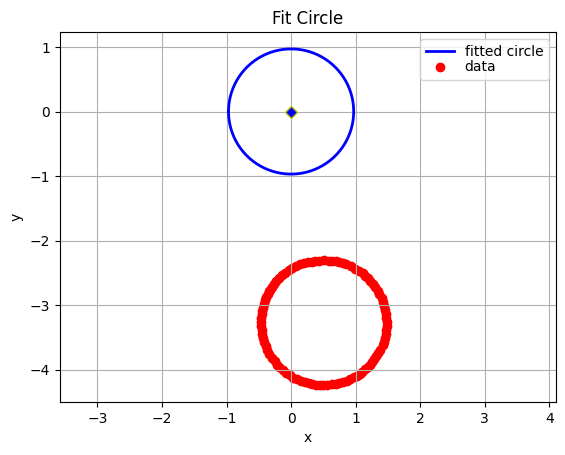

In [13]:
xc, yc, r, sigma = circle.standardLSQ(circle_samples)

print("Calculated circle with error: ", sigma, " xc: ", xc, " yc: ", yc, " r: ", r)
circle.plot_data_circle(circle_samples, 0, 0, r)


In [14]:
fixingPoint = circle_samples[0]
ic(fixingPoint)
src_points = np.array([(xc, yc-r),(xc - r, yc),(xc, yc), (xc + r, yc), fixingPoint])
dst_points = np.array([(0, -r), (-r, 0), (0,0), (r, 0), (0, r)])

ic| fixingPoint: (-0.33586010336875916, -2.7751126289367676)


In [15]:
import numpy as np

def calculate_rotation_angle(coords1, coords2):
    """
    Calculate the rotation angle between two sets of coordinates on circles.

    Args:
        coords1 (list of tuples): Coordinates on the first circle.
        coords2 (list of tuples): Corresponding coordinates on the second circle.

    Returns:
        float: Rotation angle in degrees.
    """
    # Convert lists of tuples to numpy arrays
    coords1 = np.array(coords1)
    coords2 = np.array(coords2)

    # Calculate the center of each set of coordinates (assuming they are centered)
    center1 = np.mean(coords1, axis=0)
    center2 = np.mean(coords2, axis=0)

    # Translate coordinates to the origin
    translated_coords1 = coords1 - center1
    translated_coords2 = coords2 - center2

    # Calculate the rotation matrix using Singular Value Decomposition (SVD)
    U, _, Vt = np.linalg.svd(np.dot(translated_coords2.T, translated_coords1))
    R = np.dot(U, Vt)

    # Calculate the rotation angle in radians
    rotation_angle_rad = np.arctan2(R[1, 0], R[0, 0])

    # Convert rotation angle to degrees
    rotation_angle_deg = np.degrees(rotation_angle_rad)

    return rotation_angle_deg

# Example usage
# coords1 = [(1, 0), (0, 1), (-1, 0), (0, -1)]
# coords2 = [(0, -1), (1, 0), (0, 1), (-1, 0)]

# rotation_angle = calculate_rotation_angle(coords1, coords2)
# print(f"The rotation angle is {rotation_angle:.2f} degrees.")



In [16]:
rotation_angle = calculate_rotation_angle(src_points, dst_points)
ic(rotation_angle)  

ic| rotation_angle: np.float64(-13.880259721776826)


np.float64(-13.880259721776826)

ic| transformed_points: [(np.float64(-0.8407813857576358), np.float64(0.49449552170694533)),
                         (np.float64(-0.8638282667181003), np.float64(0.445544611138708)),
                         (np.float64(-0.8871328781625736), np.float64(0.39229286782205763)),
                         (np.float64(-0.9051416765233982), np.float64(0.3445609914487666)),
                         (np.float64(-0.9223197947523105), np.float64(0.29454887978494826)),
                         (np.float64(-0.939792181112479), np.float64(0.23190773598612013)),
                         (np.float64(-0.9503888736745822), np.float64(0.18155516259134474)),
                         (np.float64(-0.9593660484334934), np.float64(0.1267558442777461)),
                         (np.float64(-0.9650632391950595), np.float64(0.0726157533353633)),
                         (np.float64(-0.9682052384397495), np.float64(0.004037510079748063)),
                         (np.float64(-0.9662434111616123), np.float64(-0.05

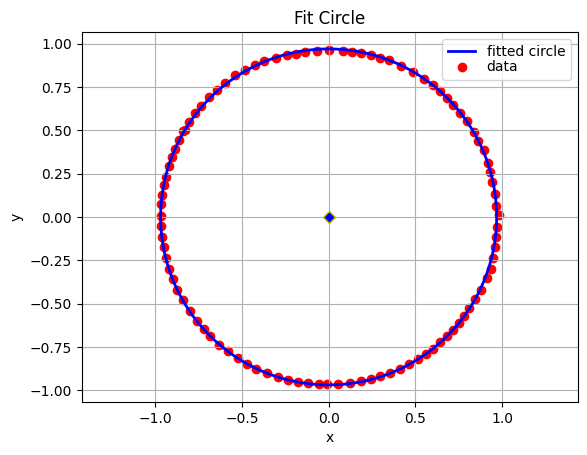

In [28]:
xOffset = 0
yOffset = 0
translation = (0 + xOffset - xc, 0 + yOffset - yc)
scale = (1,1)
    
  
transformed_points = [transform_point((x,y), translation, scale, 0) for x,y in circle_samples]
ic(transformed_points)
circle.plot_data_circle(transformed_points, 0, 0, r)

In [30]:
transformed_points_rotated = [transform_point((x.item(),y.item()), 0, 0, rotation_angle) for x,y in transformed_points]
circle.plot_data_circle(transformed_points_rotated, 0, 0, r)

TypeError: cannot unpack non-iterable int object

In [24]:
# The transformed value of the first circle sample should correspond to (0,r) in FRC field coordinates
ic(transformed_points_rotated[0])
ic(circle_samples[0])

NameError: name 'transformed_points_rotated' is not defined